---
title: Transforming workflow for oeanography study using S2 data, from SAFE to ZARR
subtitle: Computing wave 
authors:
  - name: Tina Odaka
    orcid: 0000-0002-1500-0156
    github: tinaok
    affiliations:
      - id: IFREMER
        institution: IFREMER
        ror: 044jxhp58
  - name: Anne Fouilloux
    orcid: 0000-0002-1784-2920
    github: annefou
    affiliations:
      - id: Simula Research Laboratory
        institution: Simula Research Laboratory
        ror: 00vn06n10
date: 2025-01-29
thumbnail: https://raw.githubusercontent.com/EOPF-Sample-Service/eopf-sample-notebooks/refs/heads/main/notebooks/static/ESA_logo_2020_Deep.png
keywords: ["earth observation", "remote sensing"]
tags: ["template"]
releaseDate: 2025-07-29
datePublished: 2025-07-29
dateModified: 2025-07-30
github: https://github.com/EOPF-Sample-Service/eopf-sample-notebooks
license: Apache-2.0
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

## Table of contents

- [Introduction](#Introduction)

- [Setup](#Setup)

- [Access the Analysisi Ready Clowed Optimised EOPF ZARR  file](#Read)

(Introduction)=
## Introduction

This notebook,  we will show the example of transformation of research workflow using SAFE file format to new EOPF ZARR format.
https://github.com/tinaok/eopf-webiner6/blob/main/SAFE_workflow.ipynb is the original notebook.
To understand the scientific background of this notebook, please reffer to https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JC012425

It use research package  https://github.com/cuevas-a97/S2_Codes , that has function to load SAFE format to convert it to xarray format, and also make computation of wave spectrum. 

With EOPF zarr, the part for loading safe format and transofrming it to xarray is not need ded, it will be showin in one cell. 

Only part, for computing wave freqeuncy, needed are copied into this notebook. 

:::{hint} Overview
**Questions**
- What is the original workflow does?
- What is needed to make use of EOPF ZARR?
- 

**Objectives**
- Objective 1
- Objective 2
:::

(Setup)=
## Setup
Start importing the necessary libraries

In [2]:
!pip install hvplot datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 54.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [hvplot]14/15 [hvplot]ws]]


In [14]:
import xarray as xr
import hvplot.xarray
import pystac_client
import holoviews as hv
import numpy as np

(Read)=
## Access the Analysisi Ready Clowed Optimised EOPF ZARR  file

Here, we look at [EOPF Sample service example notebook](https://eopf-sample-service.github.io/eopf-sample-notebooks/stac-eopf-zarr-sentinel)
 and just copied pasted some cells. 
We use same LON, LAT, date as the safe workflow notebook (https://github.com/tinaok/eopf-webiner6/blob/main/SAFE_workflow.ipynb)

As indicated in the original workflow, we only need S2L1C image, but here to show the example quicklook together, we load also S2L2A image in the same time. 


In [4]:
#lets try to specify 'ocean' point and see if we have any specific metadta to collect 'ocean' parts from stac catalog,

catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
LON, LAT = -4.5, 48

date = "2025-06-17/2025-06-17"

collections=['sentinel-2-l1c','sentinel-2-l2a']
# Search with cloud cover filter
items = list(
    catalog.search(
        datetime=date,
        collections=collections,
    intersects=dict(type="Point", coordinates=[LON, LAT]),
        query={
            "eo:cloud_cover": {"lt": 20},
            "view:sun_elevation": {"lt": 27},
        },
    ).items()
)

for item in items:
        print(f"✅ {item.id}")


✅ S2B_MSIL2A_20250617T112109_N0511_R037_T30UUU_20250617T133829
✅ S2B_MSIL1C_20250617T112109_N0511_R037_T30UUU_20250617T131418


### Opening the L2A data in lazy xarray format using eopf xarray backend.  

As shown in the output of last cell, STAC gave us back S2L2A data as first item and S2L1C data as second item. Let's try top open the S2L2A, in the first item, and plot the quickview to verify where we are looking. (we can use L1C quickview, but L2A would be faster thus i used L2A here 
In the original workflow it use 
```
%run S2_Codes/Visualisation_image.ipynb
```
But with EOPF zarr format these kind of specific developement for calling `rasterio` are not needed anymore. Loading other higher product, for example by making use of stac catalogue, is very simple, thanks to the starc+zarr. 


In [5]:
item = items[0]  # extracting the first item , S2L2A(S2B_MSIL2A_20250617T112109_N0511_R037_T30UUU_20250617T133829)

l2a = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.persist()    
l2a_plot=l2a.quality_l2a_quicklook_r60m_tci.hvplot.rgb(x='quality_l2a_quicklook_r60m_x',
                                              y='quality_l2a_quicklook_r60m_y',
                                              bands='quality_l2a_quicklook_r60m_band',
                                              aspect='equal', 
                                              rasterize=True,
                                             )
l2a_plot

:DynamicMap   []
   :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)

### Opening the L1C data in  xarray format using eopf xarray backend

The image shows non crowdy ocean region, Let's work on this image to compute wave spectrum! 
We load item[1], which contains information to load S2L1C

Next workflow is to 'identify the detector.  In the above example we opend the file using 'open_dataset'. In the backend, it use a tool called 'xarray-eopf'.  The EOPF zarr format is written in the disk in a format called 'datatree' as shown in next cell output.  Which requires more 'clicking' to look into each detail, but with open_dataset, all datasets are easily accessible.  

For advanced Sentinel2 users, if they use open_dataset, and can't find information you are looking for, we recommend that you try to use open_datatree and take a deep dive into the data.



In [34]:
item = items[1]  # extracting the second item S2L1C (S2B_MSIL1C_20250617T112109_N0511_R037_T30UUU_20250617T131418)

l1c = xr.open_datatree(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.persist()  
l1c

<xarray.DataTree>
Group: /
│   Attributes: (3)
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 7)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 56B 3 4 5 6 7 8 9
│   │         * x                              (x) int64 184B 300000 305000 ... 410000
│   │         * y                              (y) int64 184B 5400000 5395000 ... 5290000
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 300005 300015 300025 300035 ... 409775 409785 409795
│   │   │   │         * y        (y) int64 88kB 5399995 5399985 5399975 ... 5290225 5290215 5290205
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 300010 300030 300050 300070 ... 409750 409770 409790
│   │   │   │         * y        (y) int64 44kB 5399990 5399970 5399950 ... 5290250 5290230 5290210
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 300030 300090 300150 300210 ... 409650 409710 409770
│   │   │             * y        (y) int64 15kB 5399970 5399910 5399850 ... 5290350 5290290 5290230
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │               b10      (y, x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   └── Group: /conditions/mask/l1c_classification
│   │       └── Group: /conditions/mask/l1c_classification/r60m
│   │               Dimensions:  (y: 1830, x: 18

In [ ]:
l1c.attrs['other_metadata']['mean_sun_azimuth_angle_in_deg_for_all_bands_all_detectors']
(list(l1c.attrs['other_metadata'].keys()))


### Identifying the detector

To compute wave frequecny we need to 'crop' the image where the data shows 'wave' and all the data we will exampine are taken from the same 'detector' of S2 satelite. It is also imporatnt to know the sun_angle, viewing_incidence_angeles 

Lets look into the L1C datree, where we can find these information.  

# ATT TO BE FIXED here with the docker image of jupyterhub.user.eopf.eodc.eu, hvplot image is not interactive (chaging detector etc does not update the image) 


In [8]:
(
    l1c['conditions']['geometry']['sun_angles'].hvplot(
    x='x',y='y' )
+l1c['conditions']['geometry']['viewing_incidence_angles'].hvplot(
    x='x',y='y' 
)
).cols(1)

:Layout
   .DynamicMap.I  :DynamicMap   [angle]
      :Image   [x,y]   (sun_angles)
   .DynamicMap.II :DynamicMap   [detector,band,angle]
      :Image   [x,y]   (viewing_incidence_angles)

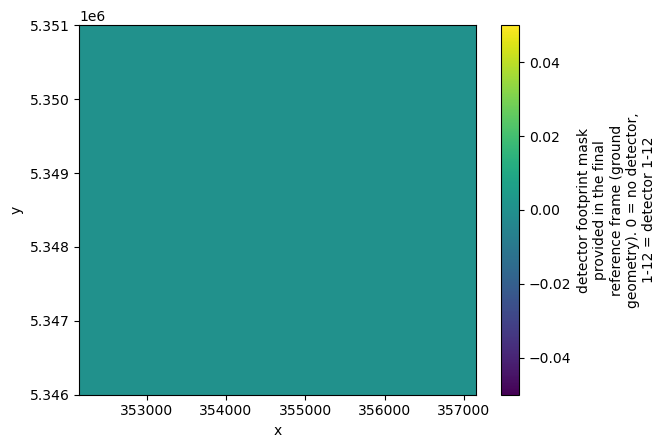

In [19]:
l1c['conditions']['mask']['detector_footprint']['r10m'].b02.plot()


### We chose an area and verify that it is from the same detector

We are interested in B04 and B02 bands which are in 10m resolution.  
We clip a region of our interest, verify that it has the same detector, and also plot the bands which we will use to compute wave spectrum.  

We chose the image location with UTM grid, 5km 5km 


In [39]:


#add ocean mask =6 and non cloud mas, and same detector mask so that the chose is helped automatically.
#
size = 5000
minx = 352150
miny= 5346000 #5355000, 5343000, 5326000
maxx = minx + size
maxy = miny + size


# drow box：using HoloViews's Rectangles at (x0, y0, x1, y1)
box = hv.Rectangles([(minx, miny, maxx, maxy)]).opts(
    line_color='white',    
    line_width=1,
    fill_alpha=0          
)


#clip out l1c in the small area. 
l1c=l1c.sel(x=slice(minx,minx+size),y=slice(miny+size,miny))
#radiance_da=radiance_da.sel(x=slice(minx,minx+size),y=slice(miny+size,miny)).persist()


b04=l1c['measurements']['reflectance']['r10m'].b04

#prepare plot of b04
b04_plot=b04.hvplot(x='x', y='y',
                                              aspect='equal', 
                                              rasterize=True,
                                              datashader=True
                                             )
b04_detector = l1c['conditions']['mask']['detector_footprint']['r10m']['b04'].astype(int)

#plot detector info 
#b04_detector_plot = b04_detector.hvplot.hist()

detector = np.unique(b04_detector.values)

#Verify the detector 

if len(detector) > 1:
    raise ValueError(f"b04_detector is not uniq! : {detector}")
else:
    print(f"✅ : The clipped domain is all in a same detector: ({detector})")

(l2a_plot * box +b04_plot
 #+b04_detector_plot
).cols(1)

✅ : detector ([6])


:Layout
   .DynamicMap.I  :DynamicMap   []
      :Overlay
         .RGB.I        :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)
         .Rectangles.I :Rectangles   [x0,y0,x1,y1]
   .DynamicMap.II :DynamicMap   []
      :Image   [x,y]   (TOA reflectance from MSI acquisition at spectral band b04 665.0 nm)

In [38]:
np.unique(l1c['conditions']['mask']['detector_footprint']['r10m']['b04'].astype(int).compute().values)


array([3, 4, 5, 6, 7, 8, 9])

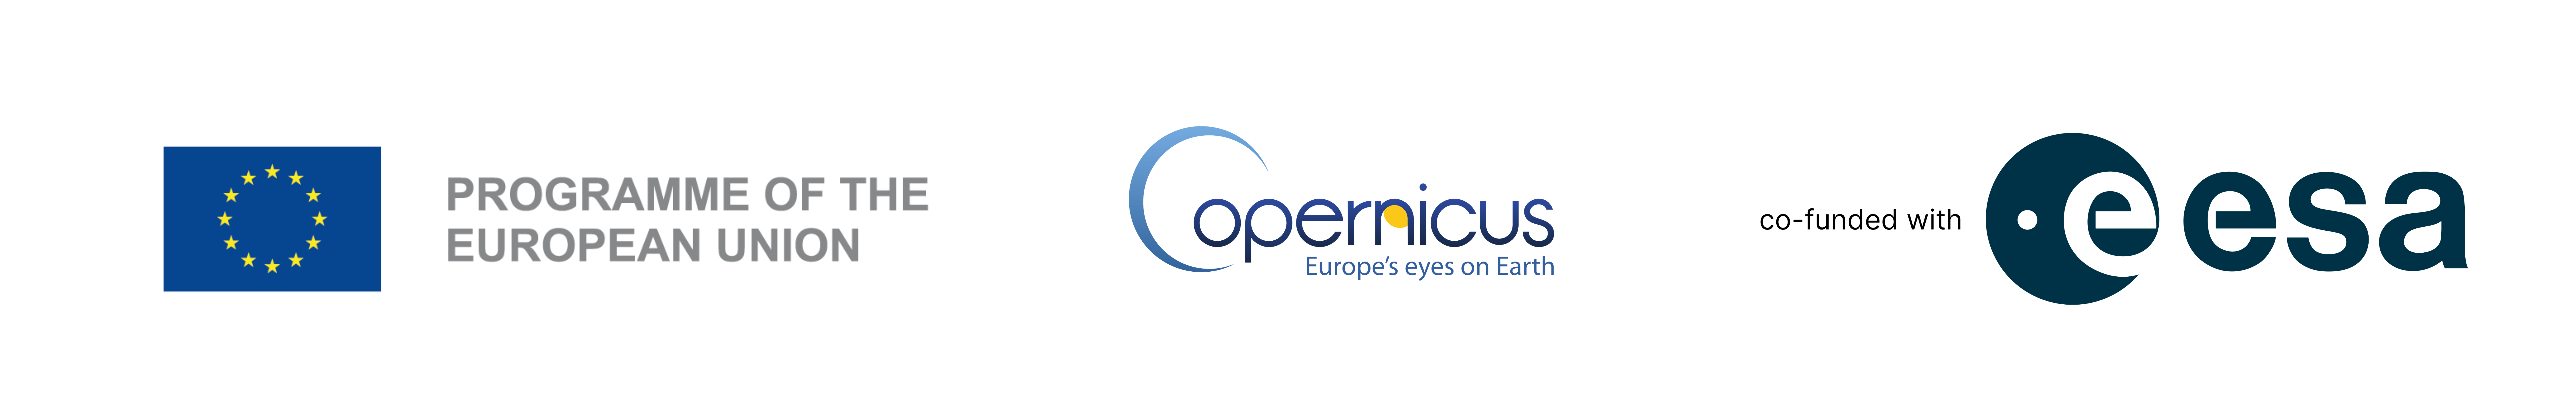